In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
listings=pd.read_csv('listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
listings['price'].head()

0     $85.00
1    $150.00
2    $975.00
3    $100.00
4    $450.00
Name: price, dtype: object

In [4]:
prices = listings['price'].map(lambda p: int(p[1:-3].replace(",", "")))

In [5]:
prices.head()

0     85
1    150
2    975
3    100
4    450
Name: price, dtype: int64

In [6]:
prices.describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

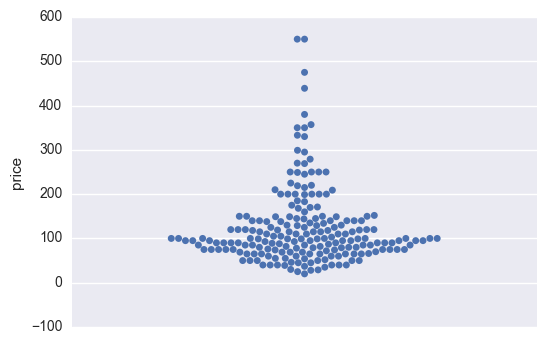

In [7]:
sns.swarmplot(y=prices.sample(200))

In [8]:
listings['price'] = prices

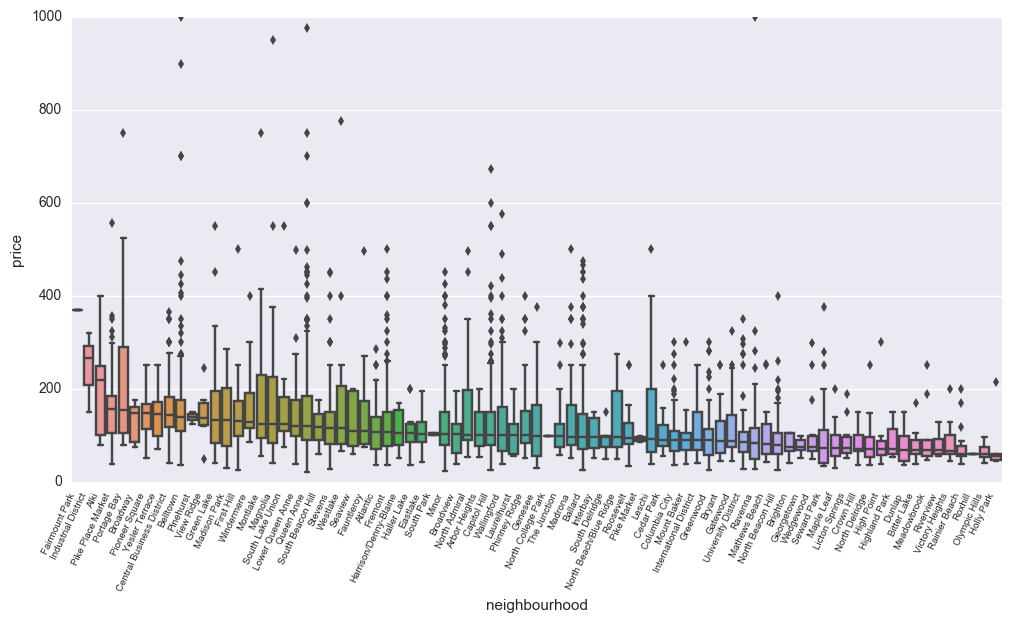

In [9]:
plt.figure(figsize = (12, 6))
sort_order = listings.groupby('neighbourhood')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='neighbourhood', data=listings.query('price <= 1000'), 
            order=sort_order)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=65, ha='right', fontsize=7)
plt.show()

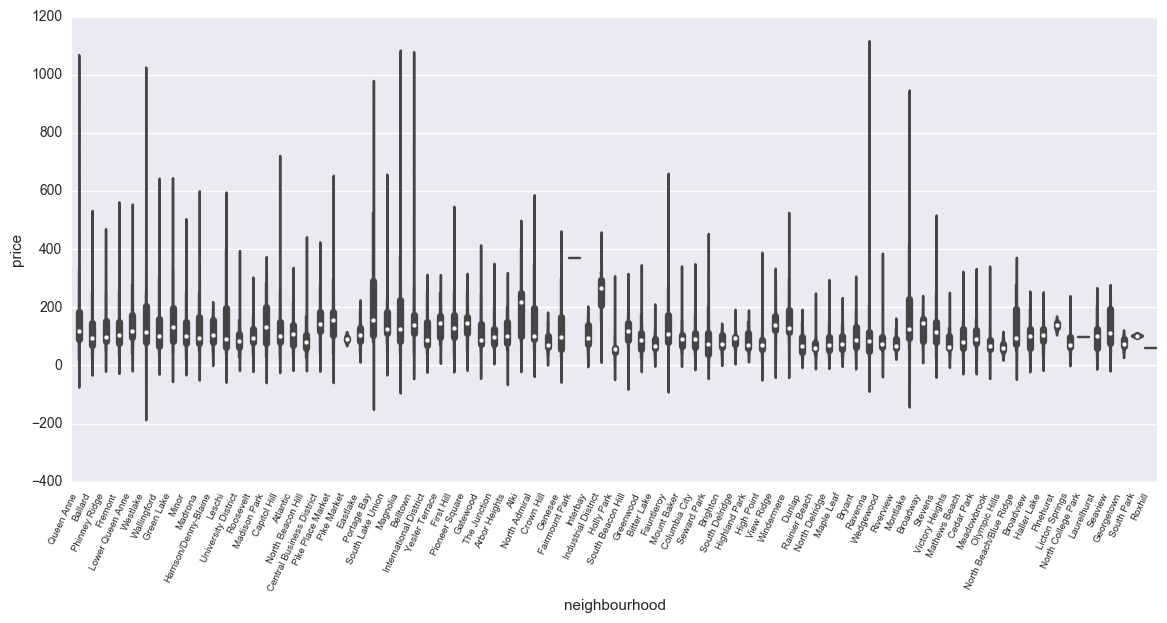

In [10]:
plt.figure(figsize = (14, 6))
sns.violinplot('neighbourhood', 'price', data = listings)
xt = plt.xticks(rotation=65, ha='right', fontsize= 7)

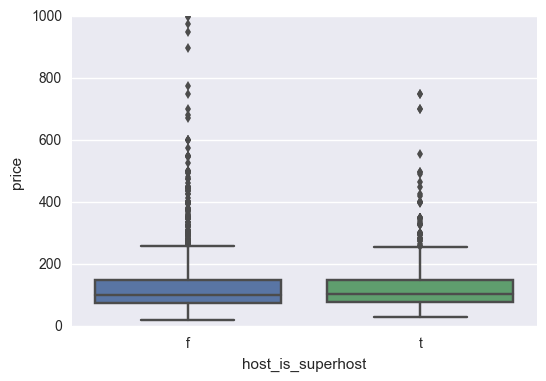

In [11]:
sns.boxplot(y='price', x='host_is_superhost', data=listings)

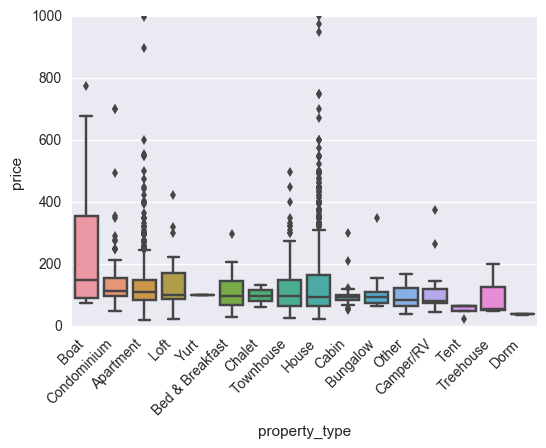

In [12]:
sort_order = listings.groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='property_type', data=listings.query('price <= 1000'), order=sort_order)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

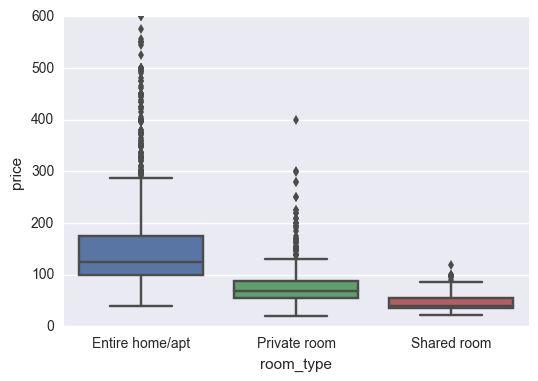

In [13]:
sort_order = listings.groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='room_type', data=listings.query('price <= 600'), order=sort_order)

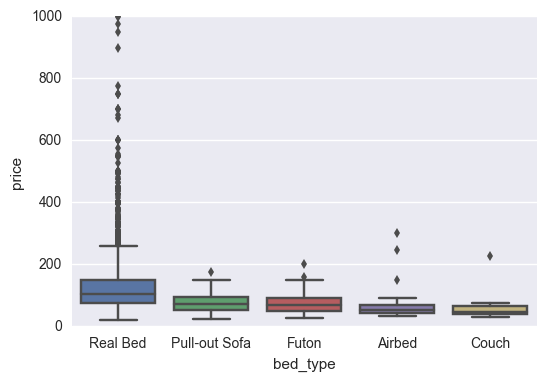

In [14]:
sort_order = listings.groupby('bed_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='bed_type', data=listings, order=sort_order)

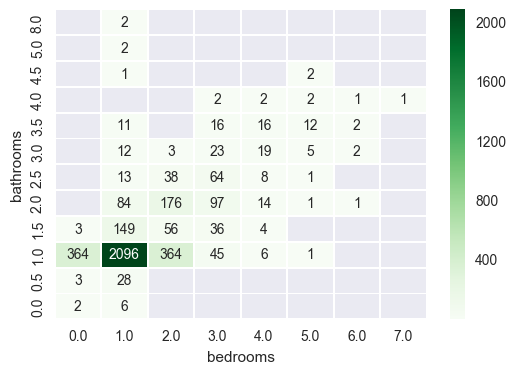

In [15]:
sns.heatmap(listings.groupby(['bathrooms', 'bedrooms'])\
                .count()['price']\
                .reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price')\
                .sort_index(ascending=False),
            cmap="Greens", fmt='.0f', annot=True, linewidths=0.5)

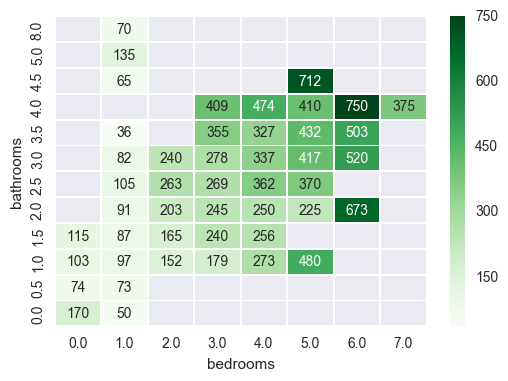

In [16]:
sns.heatmap(listings.groupby(['bathrooms', 'bedrooms'])\
                .mean()['price']\
                .reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price')\
                .sort_index(ascending=False),
            cmap="Greens", fmt='.0f', annot=True, linewidths=0.5)

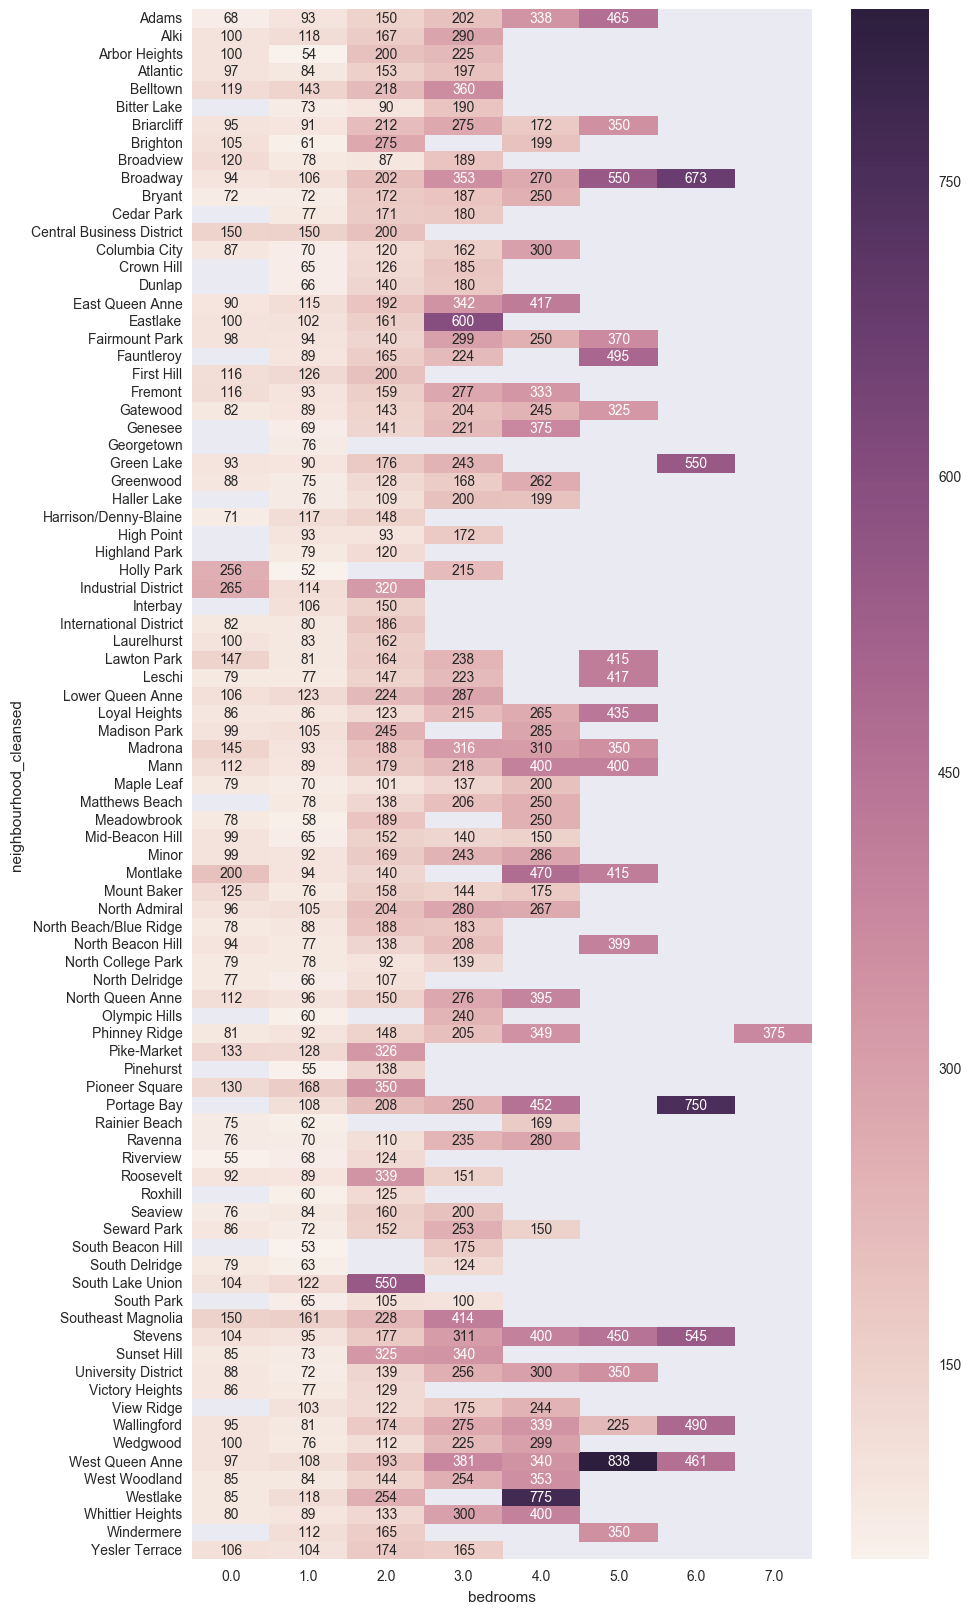

In [17]:
plt.figure(figsize=(10,20))
sns.heatmap(listings.groupby([
        'neighbourhood_cleansed', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")

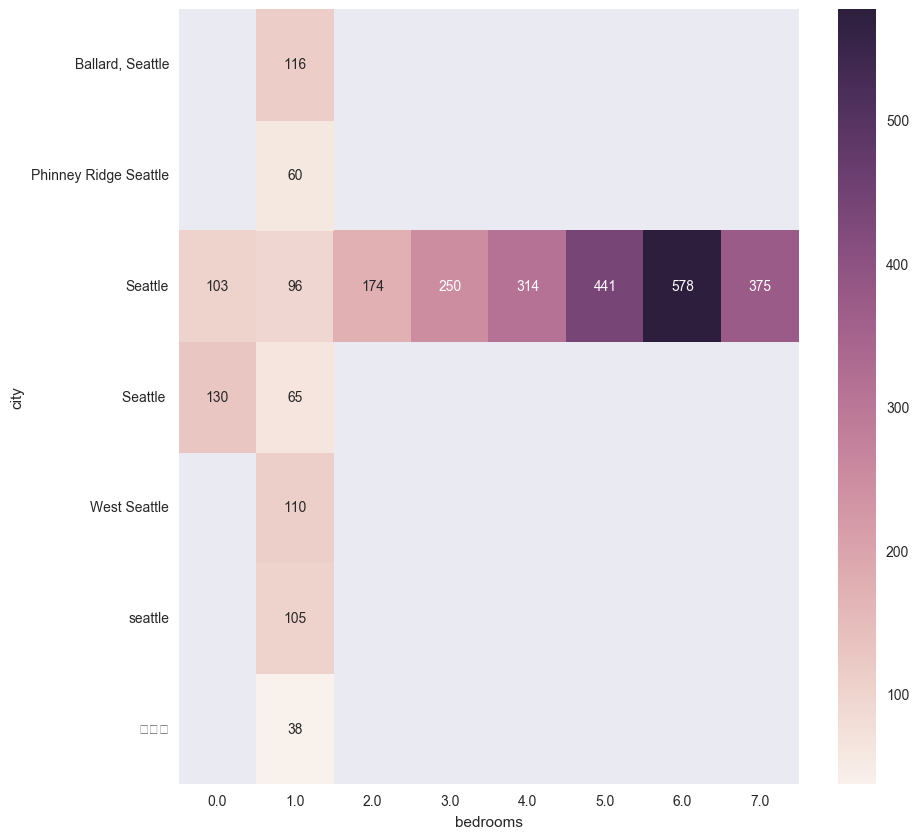

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(listings.groupby([
        'city', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")

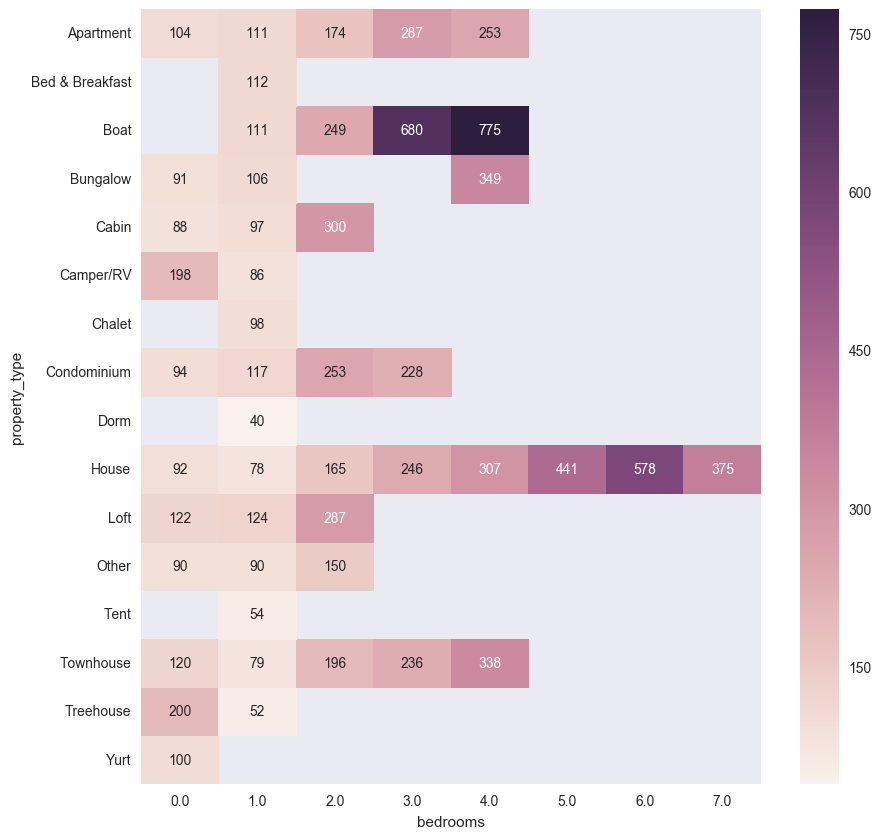

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(listings.groupby(['property_type', 'bedrooms']).price.mean().unstack(), annot=True, fmt=".0f")

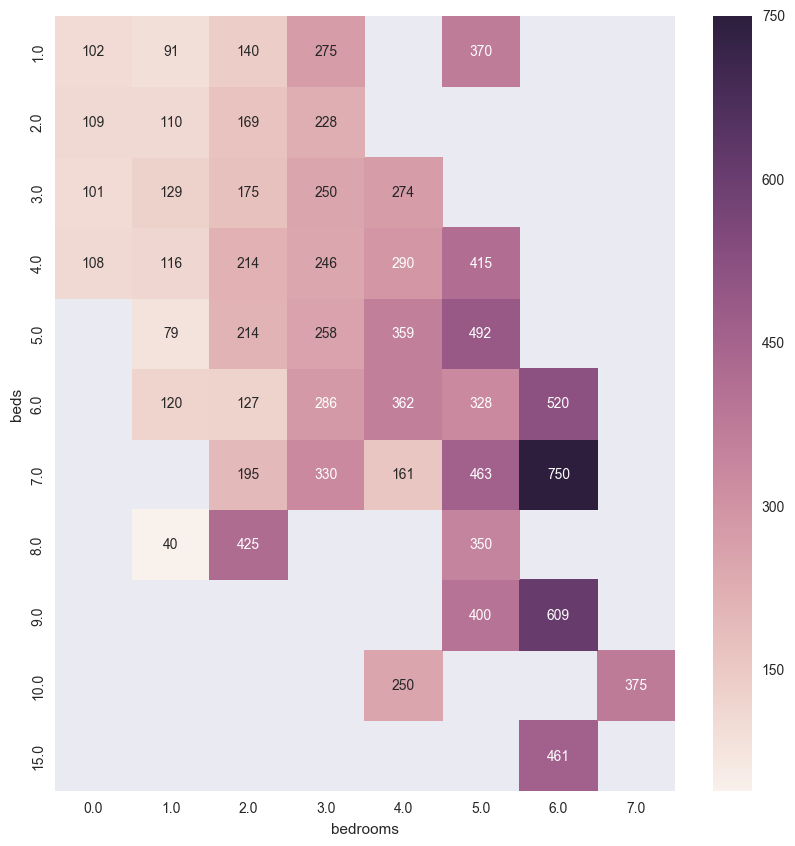

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(listings.groupby(['beds', 'bedrooms']).price.mean().unstack(), annot=True, fmt=".0f")

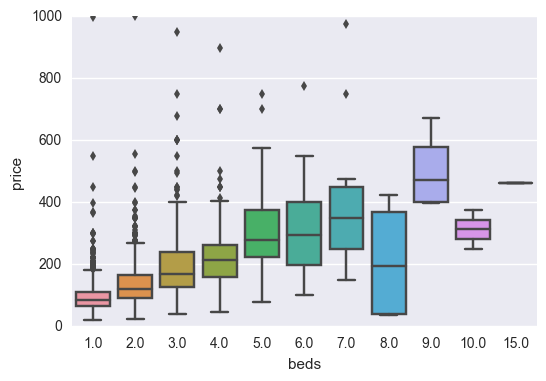

In [21]:
sns.boxplot(y='price', x='beds', data=listings)

In [22]:
listings['amenities'] = listings['amenities'].map(
    lambda amns: "|".join([amn.replace("}", "").replace("{", "").replace('"', "")\
                           for amn in amns.split(",")])
)

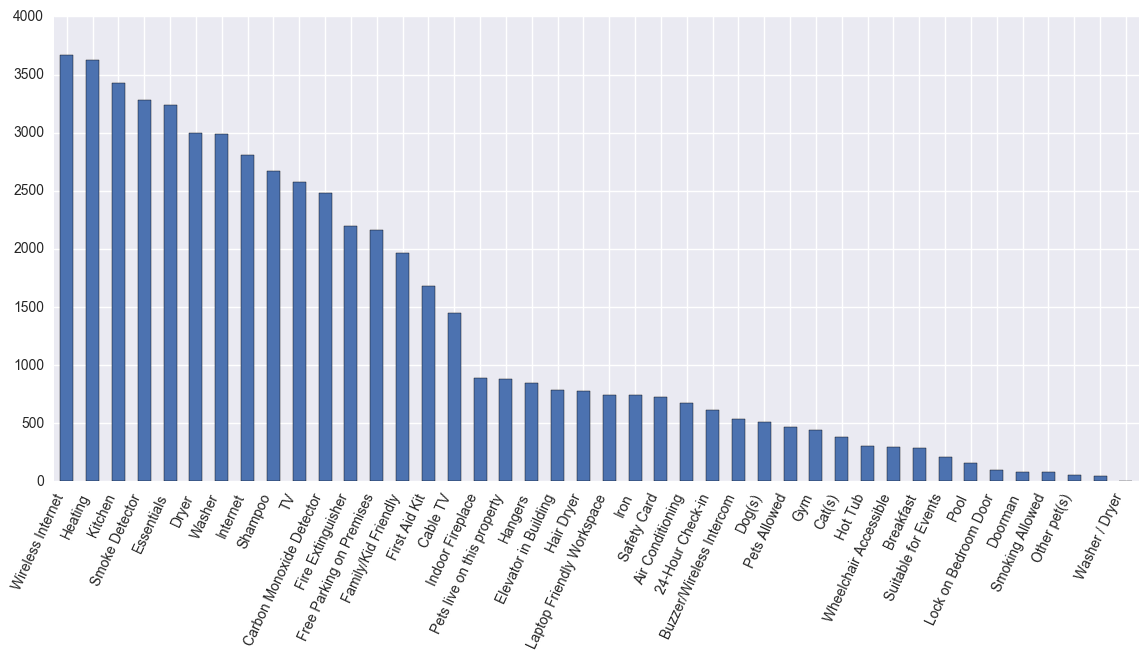

In [23]:
plt.figure(figsize=(14,6))
pd.Series(np.concatenate(listings['amenities'].map(lambda amns: amns.split("|"))))\
    .value_counts()\
    .plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=65, ha='right', fontsize=10)
plt.show()

In [24]:
amenities = np.unique(np.concatenate(listings['amenities'].map(lambda amns: amns.split("|"))))
amenity_prices = [(amn, listings[listings['amenities'].map(lambda amns: amn in amns)]['price'].mean()) for amn in amenities if amn != ""]
amenity_srs = pd.Series(data=[a[1] for a in amenity_prices], index=[a[0] for a in amenity_prices])

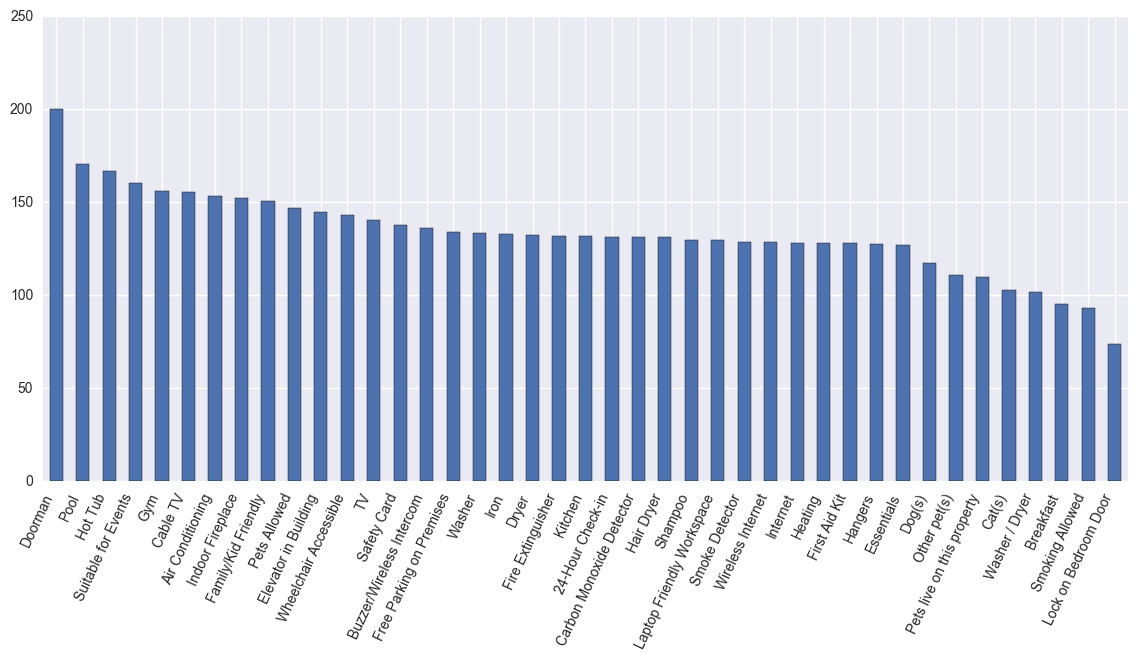

In [25]:
plt.figure(figsize = (14, 6))
amenity_srs.sort_values(ascending=False).plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=65, ha='right', fontsize=10)
plt.show()

In [26]:
calender=pd.read_csv('calendar.csv')
listings=pd.read_csv('listings.csv')
reviews=pd.read_csv('reviews.csv')
calender.set_index(['listing_id'],inplace=True)
listings.set_index('id',inplace=True)
reviews.set_index(['listing_id'],inplace=True)

In [27]:
df=calender.dropna()
df.loc[:,'date']=pd.to_datetime(df['date'])
def fun(rows):
    return float(rows['price'].split('$')[1].replace(',',''))
df.loc[:,'price']=df.apply(fun,axis=1)
df.head()

C:\Program Files\Miniconda3\lib\site-packages\pandas\core\indexing.py:560: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Program Files\Miniconda3\lib\site-packages\pandas\core\indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,date,available,price
listing_id,,,
241032,2016-01-04,t,85.0
241032,2016-01-05,t,85.0
241032,2016-01-13,t,85.0
241032,2016-01-14,t,85.0
241032,2016-01-18,t,85.0
